In [3]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/theleadio/datascience_demo/master/rfm-agg.csv')

In [7]:
df

,CustomerID,Frequency,AmountSpent
0,12347,27,75.54
1,12348,5,81.13
2,12349,16,53.57
3,12350,3,3.95
4,12352,17,109.70
...,...,...,...
4089,18280,3,12.25
4090,18281,2,2.07
4091,18282,2,19.50
4092,18283,132,227.15


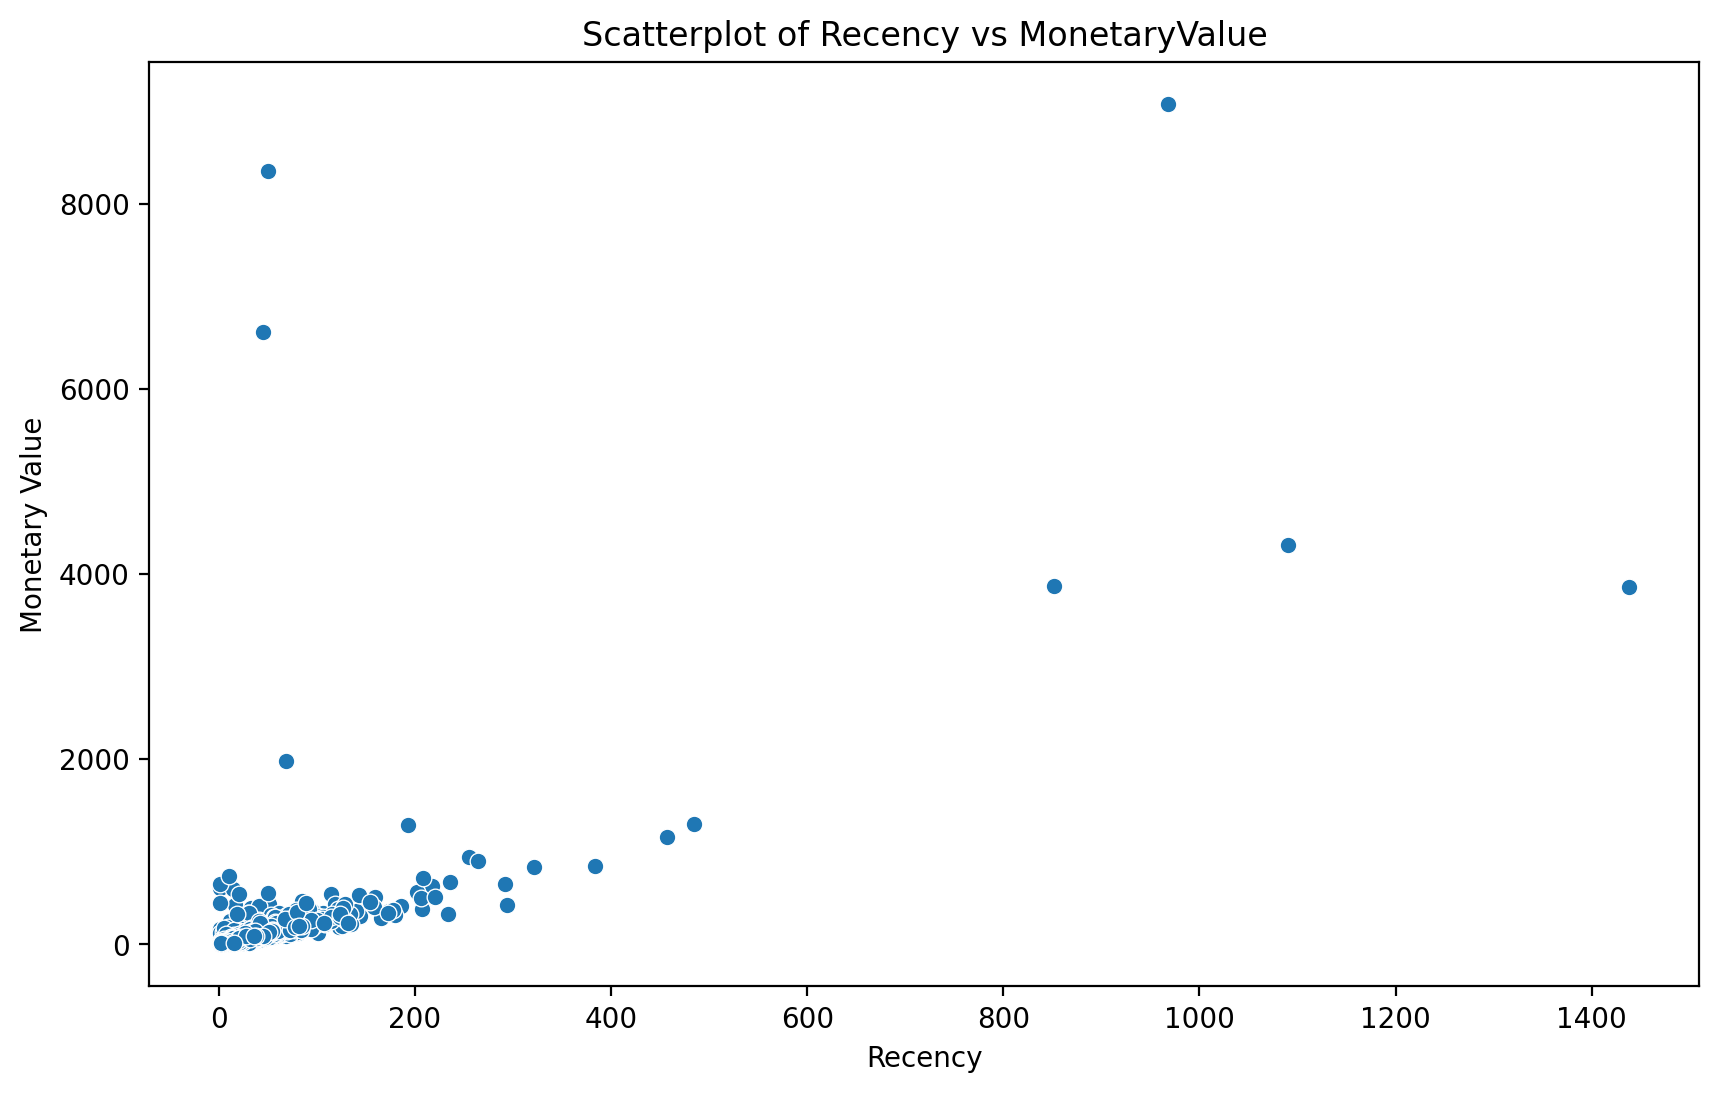

In [10]:
# prompt: draw a scatterplot for df

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='AmountSpent', data=df)
plt.title('Scatterplot of Recency vs MonetaryValue')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.show()

# Perform clustering

[[-2.41519528e-02 -3.38619962e-02]
 [ 2.43511482e+01  2.02235209e+01]
 [ 6.64295172e-01  2.87668784e+01]]


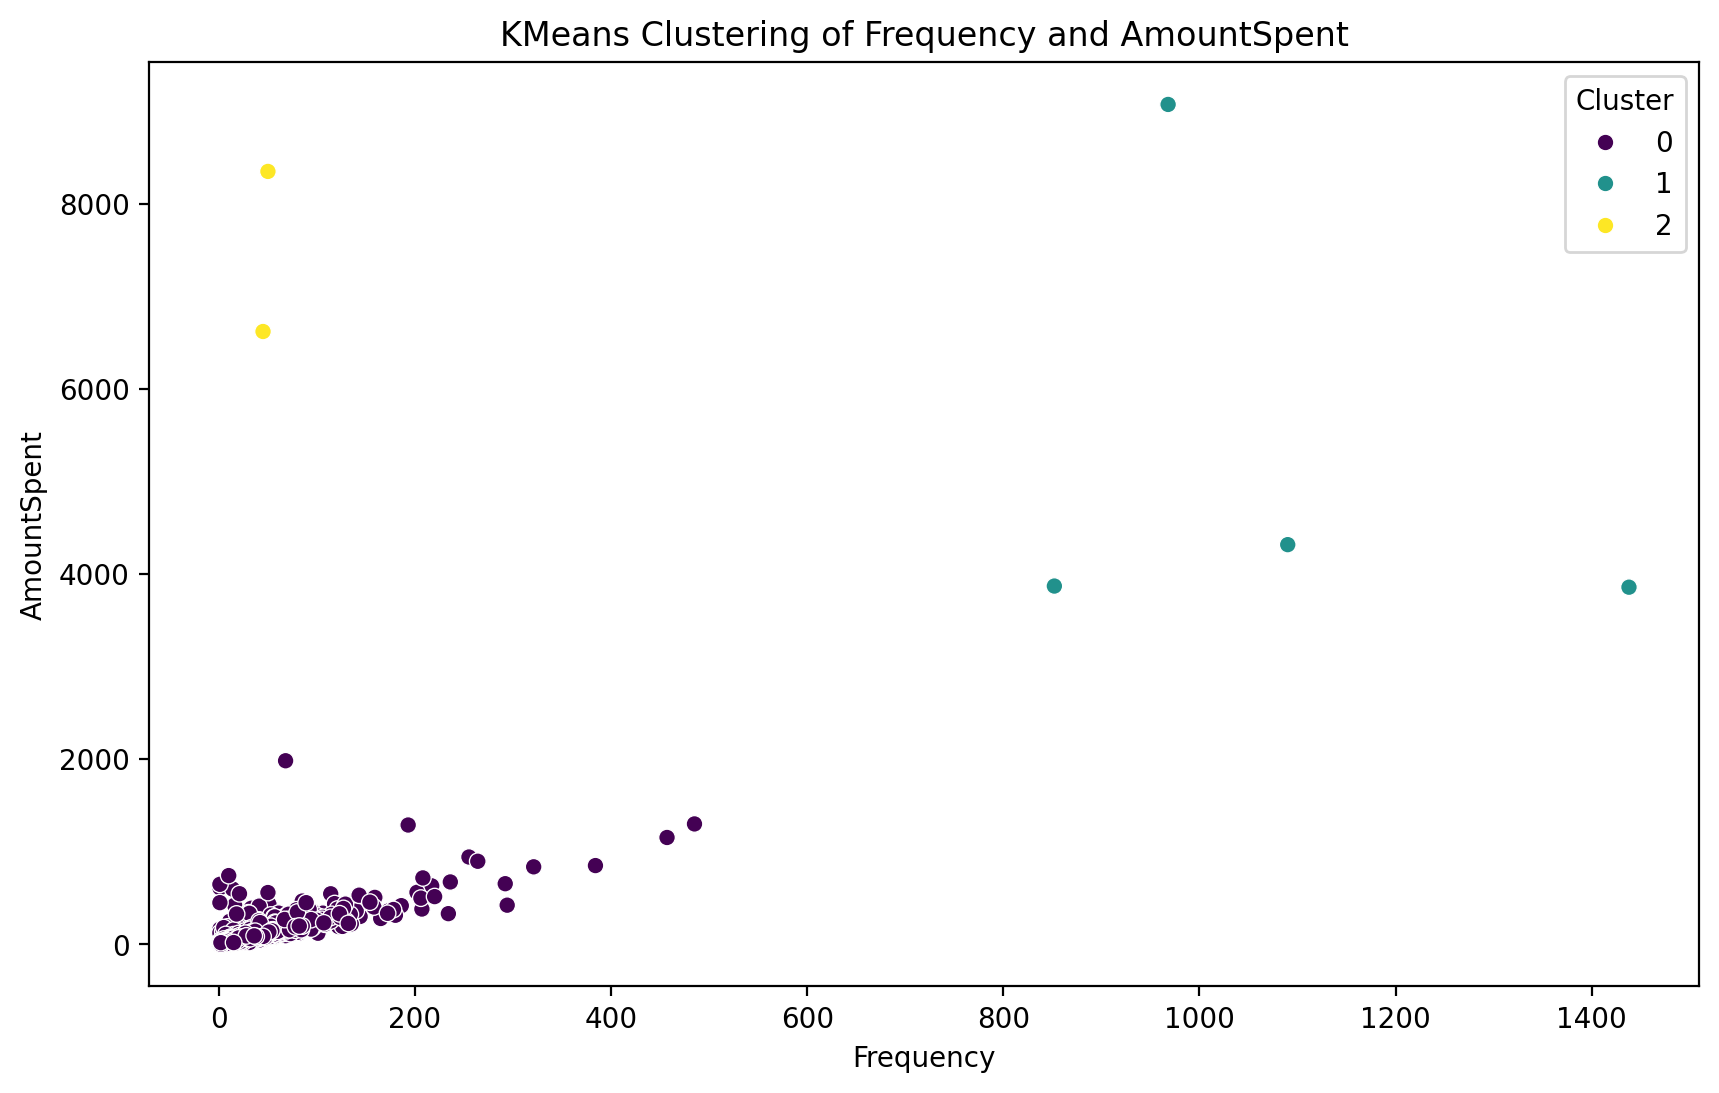

In [13]:
# prompt: perform k means clustering on df

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
X = df[['Frequency', 'AmountSpent']]

# Determine the optimal number of clusters (e.g., using the elbow method)
# ... (Code for elbow method can be added here)

# Choose the number of clusters (e.g., 3)
X = df[['Frequency', 'AmountSpent']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

print(kmeans.cluster_centers_)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='AmountSpent', hue='Cluster', data=df, palette='viridis')
plt.title('KMeans Clustering of Frequency and AmountSpent')
plt.xlabel('Frequency')
plt.ylabel('AmountSpent')
plt.show()

purple: customers who come not so frequent and spend in a low amt (need to activate them)

yellow: customers who dont come often but they spend a lot (maybe set reminder for them to come and need to set different strategies)

cyan: vvip, maybe need to set some members-only/royalty events



[[-0.14669929 -0.09499993]
 [24.35114823 20.2235209 ]
 [ 0.66429517 28.76687836]
 [ 1.72260485  0.83758174]]


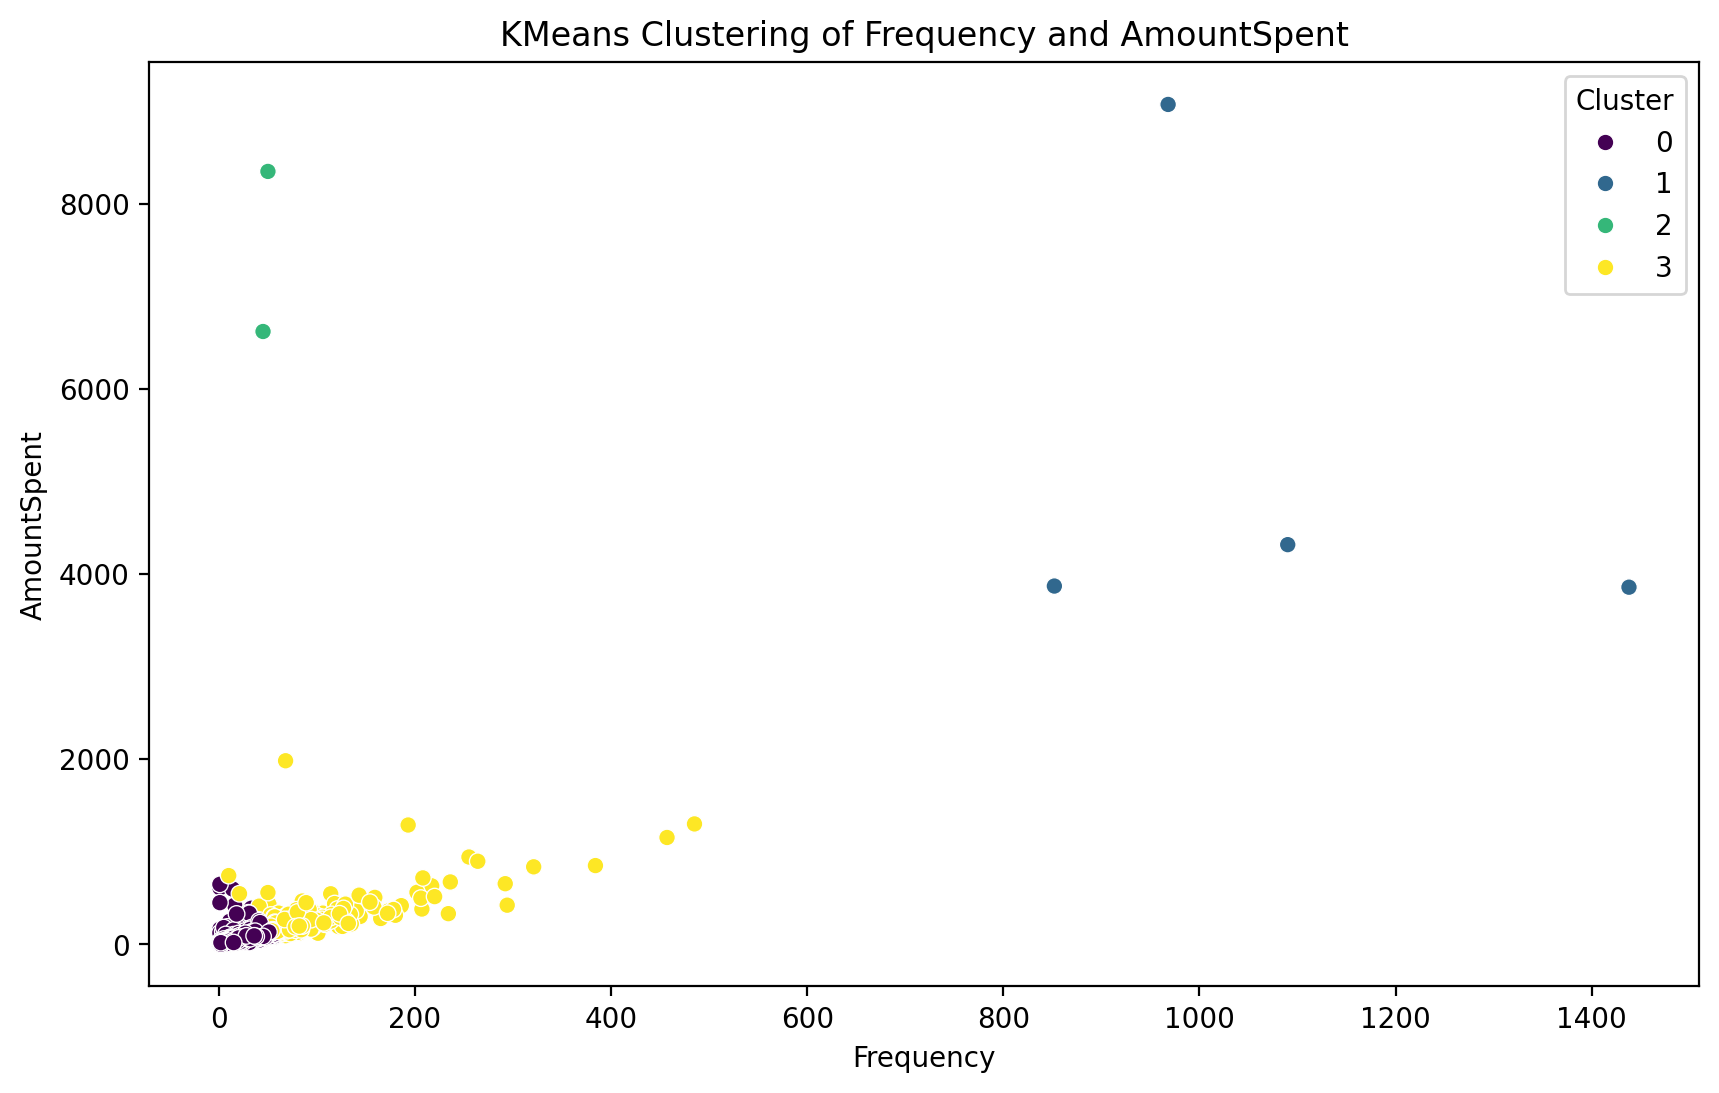

In [14]:
# prompt: perform k means clustering on df

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
X = df[['Frequency', 'AmountSpent']]

# Determine the optimal number of clusters (e.g., using the elbow method)
# ... (Code for elbow method can be added here)

# Choose the number of clusters (e.g., 3)
X = df[['Frequency', 'AmountSpent']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

print(kmeans.cluster_centers_)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='AmountSpent', hue='Cluster', data=df, palette='viridis')
plt.title('KMeans Clustering of Frequency and AmountSpent')
plt.xlabel('Frequency')
plt.ylabel('AmountSpent')
plt.show()

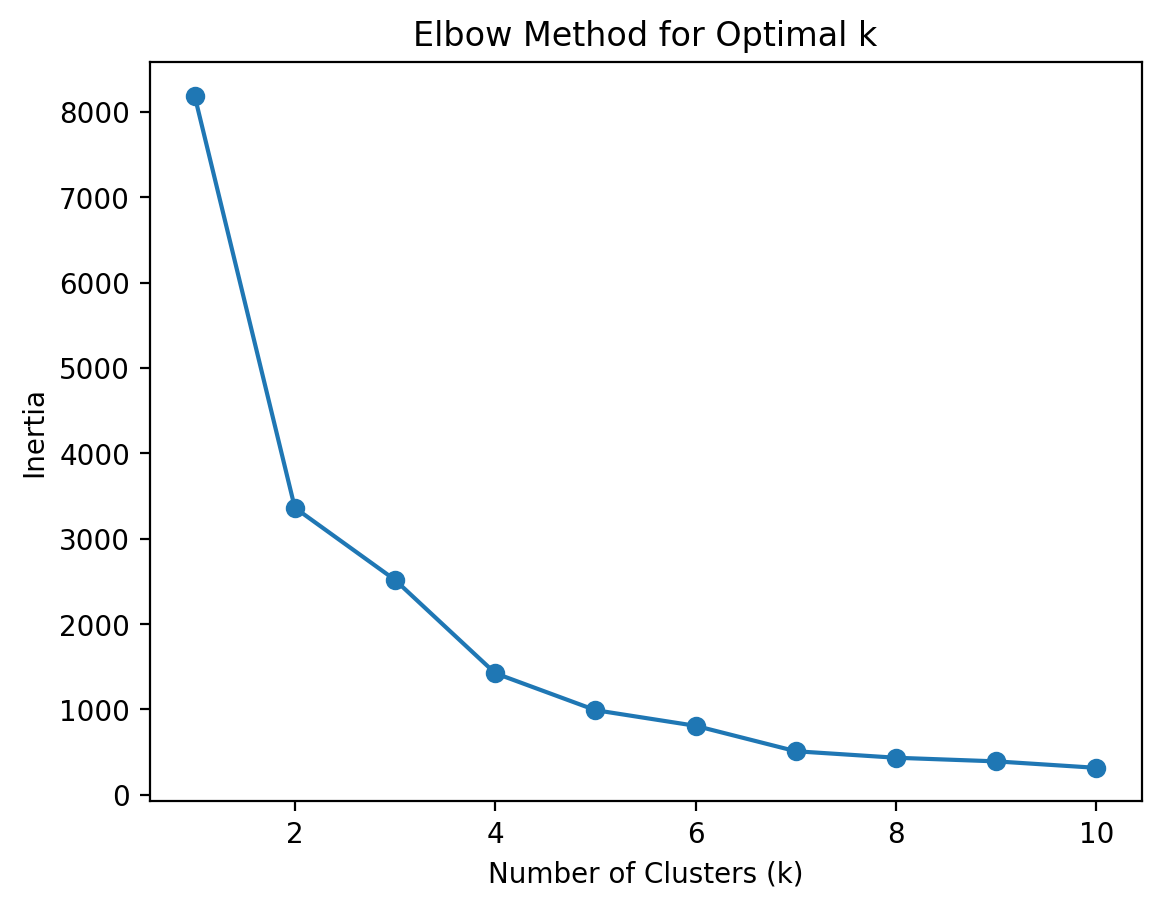

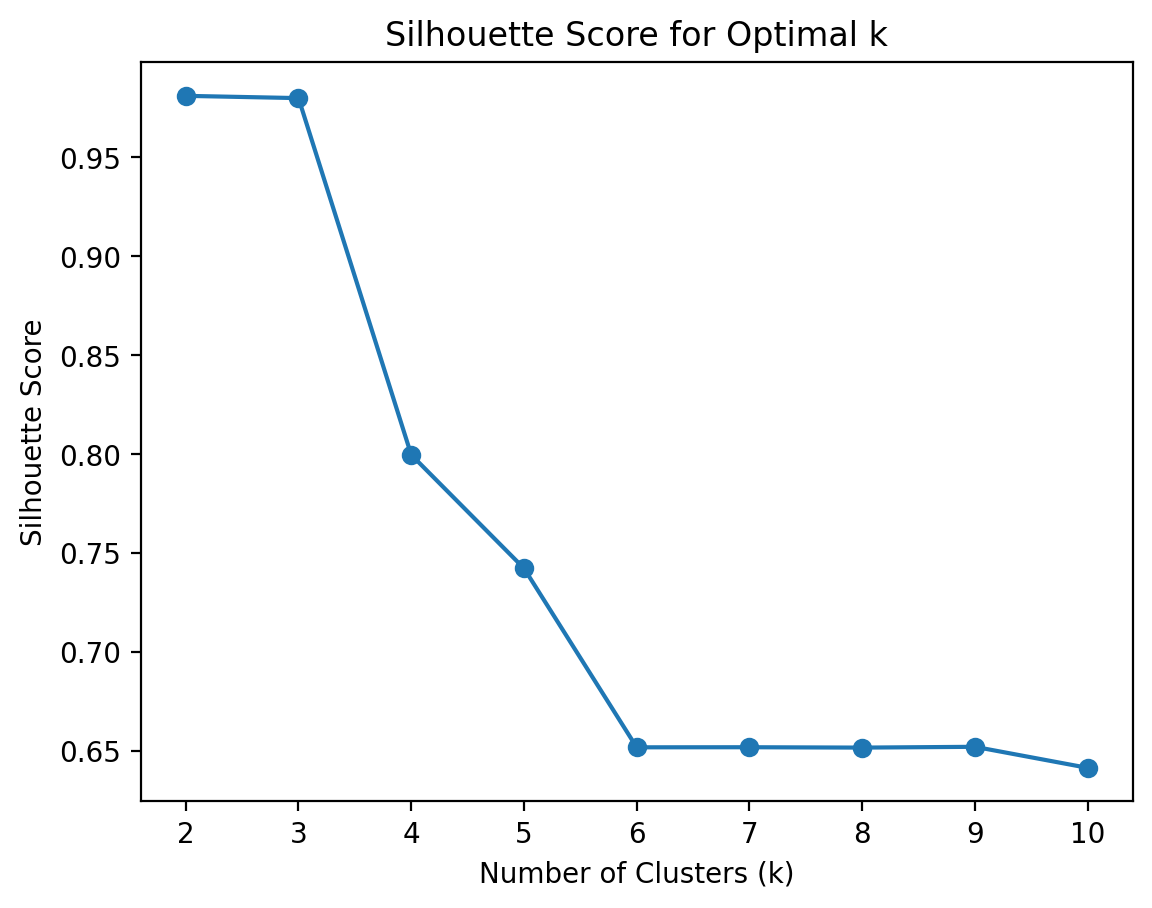

In [15]:
# prompt: find the optimum k

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

%config InlineBackend.figure_format = 'retina'
df = pd.read_csv('https://raw.githubusercontent.com/theleadio/datascience_demo/master/rfm-agg.csv')

# Select features for clustering
X = df[['Frequency', 'AmountSpent']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal k
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Silhouette score to find optimal k
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Based on the elbow method and silhouette score, choose the optimal k
# For example, if the elbow is at k=3 and the silhouette score is highest at k=3, then k=3 is the optimal number of clusters.

- elbow method
- optimum k is at 4 or 5 groups

inertia:
- to measure the noise
- inertia high, noise in cluster high, document very mixed up, not clossely related
- increasing number of clusters to minimise inertia
- optimal numbe rof k is to find the suitable k so that not so much of clusters that are similar and can merge them tgt
- elbow method is like ur elbow to find the elbow point that starts to converge and the performance maintained

DB scan (another method for clustering)
- used when we have a much messier data
- computational and more expensive

Hierarchical clustering
- can cut at different point u want

k-mean
- when ur data clean and less constraint

supervised learning
- like u can predict sales..

unsupervised learning
- get a bunch of data points and do some groupings and undersatnd more taht is related to ur business

KN need
- use knee instead of the elbow

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/theleadio/datascience_demo/refs/heads/master/movie_overview.csv')
df

,id,title,overview
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,1,Jumanji,When siblings Judy and Peter discover an encha...
2,2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,4,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...
45461,45461,Subdue,Rising and falling between a man and woman.
45462,45462,Century of Birthing,An artist struggles to finish his work while a...
45463,45463,Betrayal,"When one of her hits goes wrong, a professiona..."
45464,45464,Satan Triumphant,"In a small town live two brothers, one a minis..."


In [ ]:
# scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='title', y='revenue', data=df)
plt.title('Scatterplot of Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()